# Import

In [2]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=0d7b9ede350d1966365fec06fe37ff9f2fb9c8421b0b75016d229160b9276b1f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import nltk
!pip install wordcloud
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
import re
from string import punctuation
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer  
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import STOPWORDS
import string
import pandas as pd
pd.options.mode.chained_assignment = None


from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora # 语料库 contains the word id and its frequency in every document.
from gensim.utils import simple_preprocess #执行简单文本预处理
from gensim.models import CoherenceModel #Typically, CoherenceModel used for evaluation of topic models. The four stage pipeline is basically: Segmentation. Probability Estimation. Confirmation Measure.

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis 
import pyLDAvis.gensim_models as plt_gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [5]:
#read csv of reviews
data_u = pd.read_csv('gdrive/My Drive/275/reviews_Ubereats.csv')
data_p = pd.read_csv('gdrive/My Drive/275/reviews_Postmates.csv')
data_g = pd.read_csv('gdrive/My Drive/275/reviews_Grubhub.csv')
data_d = pd.read_csv('gdrive/My Drive/275/reviews_DoorDash.csv')

# Pre-processing

In [6]:
data_u

,ReviewID,Content,Score,Time
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34
...,...,...,...,...
9995,gp:AOqpTOEx5kYzq_HH4wIJ4Gw1gpFQmkjMvyKCLJtoubD...,If you have an issue and the driver is not com...,1,2022-03-27 05:31:02
9996,gp:AOqpTOEFE6TlAXRTbnKoseiN0BVR7-ux0w3Jwv8DAxk...,Best app,5,2022-03-27 05:23:11
9997,gp:AOqpTOFxkwB7uG2GCax9fXoMguhISkS4r67zdugJKj9...,Best food delivery app,5,2022-03-27 05:23:07
9998,gp:AOqpTOHqzdq59j07mBP-ScCo0q5SM4XBtT4MqKpmtGX...,Awful drivers cancel at drop of a hat. Going b...,1,2022-03-27 05:18:31


In [7]:
data_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   9998 non-null   object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [8]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   10000 non-null  object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [9]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  16000 non-null  object
 1   Content   15999 non-null  object
 2   Score     16000 non-null  int64 
 3   Time      16000 non-null  object
dtypes: int64(1), object(3)
memory usage: 500.1+ KB


In [10]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   10000 non-null  object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [11]:
print(data_u.isnull().sum())
print(data_p.isnull().sum())
print(data_g.isnull().sum())
print(data_d.isnull().sum())

ReviewID    0
Content     2
Score       0
Time        0
dtype: int64
ReviewID    0
Content     0
Score       0
Time        0
dtype: int64
ReviewID    0
Content     1
Score       0
Time        0
dtype: int64
ReviewID    0
Content     0
Score       0
Time        0
dtype: int64


In [12]:
data_u = data_u.dropna()
data_g = data_g.dropna()  

In [13]:
data_u["Platform"] = "Ubereats"
data_p["Platform"] = "Postmates"
data_g["Platform"] = "Grubhub"
data_d["Platform"] = "DoorDash"

In [14]:
#data_u.loc[:,'Content'] = data_u.loc[:, 'Content'].astype(str)
data_u['Content'] = data_u['Content'].astype(str)
data_p['Content'] = data_p['Content'].astype(str)
data_g['Content'] = data_g['Content'].astype(str)
data_d['Content'] = data_d['Content'].astype(str)

In [15]:
# 1. lower the words
data_u['Content1']= data_u['Content'].str.lower()
data_p['Content1']= data_p['Content'].str.lower()
data_g['Content1']= data_g['Content'].str.lower()
data_d['Content1']= data_d['Content'].str.lower()

In [16]:
contrac_dict = {"aren't": "are not", "can't": "cannot", "can't've": "cannot have", "could've": "could have", "couldn't": "could not","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hasn't": "has not","haven't": "have not","he'd": "he had","he'd've": "he would have","he'll": "he will","he'll've": "he shall have / he will have", "he's": "he is","how'd": "how did","how'll": "how will","how's": "how is","I'd": "I would","I'll": " I will","I'm": "I am","I've": "I have","isn't": "is not","it'd": " it would","it'd've": "it would have","it'll": "it will","it's": "it is","let's": "let us","mayn't": "may not","might've": "might have","mightn't": "might not","must've": "must have","mustn't": "must not","needn't": "need not","o'clock": "of the clock","oughtn't": "ought not","shan't": "shall not","she'd": "she would","she'll": " she will","she's": "she has / she is","should've": "should have","shouldn't": "should not","so've": "so have","so's": "so as / so is","that'd": "that would","that's": "that is","there'd": "there would","there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had","we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": " what will","what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have",
"who'll": "who will","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","would've": "would have","wouldn't": "would not","y'all": "you all","you'd": "you would","you'll": "you will","you're": "you are","you've": "you have"}

# 2. Expanding Contractions for reviews
contrac_re=re.compile('(%s)' % '|'.join(contrac_dict.keys()))
def expand_cont(text,contrac_dict=contrac_dict):
    def replace(text):
        return contrac_dict[text.group(0)]
    return contrac_re.sub(replace, text)

data_u['Content1']=data_u['Content1'].apply(lambda x:expand_cont(x))
data_p['Content1']=data_p['Content1'].apply(lambda x:expand_cont(x))
data_g['Content1']=data_g['Content1'].apply(lambda x:expand_cont(x))
data_d['Content1']=data_d['Content1'].apply(lambda x:expand_cont(x))

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
# 3. remove punctuation, stopwords, HTML, URL and perform lemmatization and regex
#stop_words = set(stopwords.words("english"))
stop_words = stopwords.words('english')
stop_words.extend(['doordash', 'ubereats', 'grubhub', 'postmates', 'app'])#, "food", "order", "pizza", "deliver", "delivery"])
stop_words2 = set(STOPWORDS)
def clean(text):

    # remove punctuation
    text="".join([i for i in text if i not in string.punctuation])
    # remove stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    text=" ".join([word for word in str(text).split() if word not in stop_words2])
    # lemmatization
    #from nltk.stem import WordNetLemmatizer
    #lemmatizer = WordNetLemmatizer()
    #text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # remove HTML tag
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(text) 
    text1 = soup.get_text()
    # remove URL
    text2 = re.sub(r"http?://\S+", "", text1) 
    # regex
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # remove extra space
    text = re.sub(r" +", ' ', text)
    # reomve duplicate words
    tokens = text.split()
    text1 = []
    [text1.append(x) for x in tokens if x not in text1]
    # remove len(word)<2
    text2 = [x for x in text1 if len(x) > 2]
    text3 = " ".join(text2)

    return text3

data_u['Content1']= data_u['Content1'].apply(lambda x:clean(x))
data_p['Content1']= data_p['Content1'].apply(lambda x:clean(x))
data_g['Content1']= data_g['Content1'].apply(lambda x:clean(x))
data_d['Content1']= data_d['Content1'].apply(lambda x:clean(x))


In [19]:
# combine dataset
total = pd.concat([data_u,data_p,data_g,data_d])

In [20]:
total

,ReviewID,Content,Score,Time,Platform,Content1
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...
...,...,...,...,...,...,...
9995,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food
9996,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool
9997,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite
9998,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great


In [21]:
total.reset_index(inplace = True, drop = True)
total

,ReviewID,Content,Score,Time,Platform,Content1
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...
...,...,...,...,...,...,...
45992,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food
45993,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool
45994,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite
45995,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great


In [22]:
total

,ReviewID,Content,Score,Time,Platform,Content1
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...
...,...,...,...,...,...,...
45992,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food
45993,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool
45994,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite
45995,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great


In [23]:
num = [len(i.split(' ')) for i in total["Content1"]]
#num

In [24]:
np.argmax(num)

18013

In [25]:
total["Content1"][18013]

'unlimited subscriber april order food thrice week worked well part recurring issues ultimately drove unsubscribe phone line help support send email often response takes several minutes good need immediate addition submit ticket complaints regarding change worse way amend add previous complaint respond later took long time postmate assigned point restaurant already close able pick one keeping tabs whether received making although patiently wait wanting cancel waste eventually result getting cancelled different hour delivered instance called said ready complete another opted complained asked compensation repeated inconvenience gave credit little late reported missing item never got refund drivers respectful follow instructions specify want orders left back porch text driver detailed find place common ignore even come delivery car longer communicate call wrong address location house biggest problem lack delayed sometimes completely absent'

In [26]:
# tokenization
tokenizer = WhitespaceTokenizer()
review = [tokenizer.tokenize(x) for x in total['Content1']] 

In [27]:
bigram = gensim.models.Phrases(review, min_count=2, threshold=20)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [28]:
print(bigram_mod[review[18013]])

['unlimited_subscriber', 'april', 'order', 'food', 'thrice', 'week', 'worked', 'well', 'part', 'recurring', 'issues', 'ultimately', 'drove', 'unsubscribe', 'phone', 'line', 'help', 'support', 'send_email', 'often', 'response', 'takes', 'several', 'minutes', 'good', 'need', 'immediate', 'addition', 'submit', 'ticket', 'complaints', 'regarding', 'change', 'worse', 'way', 'amend', 'add', 'previous', 'complaint', 'respond', 'later', 'took', 'long', 'time', 'postmate', 'assigned', 'point', 'restaurant', 'already', 'close', 'able', 'pick', 'one', 'keeping', 'tabs', 'whether', 'received', 'making', 'although', 'patiently', 'wait', 'wanting', 'cancel', 'waste', 'eventually', 'result', 'getting', 'cancelled', 'different', 'hour', 'delivered', 'instance', 'called', 'said', 'ready', 'complete', 'another', 'opted', 'complained', 'asked', 'compensation', 'repeated', 'inconvenience', 'gave_credit', 'little', 'late', 'reported', 'missing_item', 'never', 'got', 'refund', 'drivers', 'respectful', 'foll

In [29]:
def lemmatization(texts, allowed_postags=['NOUN']):#, 'VERB']):#'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))  
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Form Bigrams
review_bigrams = [bigram_mod[doc] for doc in review]

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
review_lemmatized = lemmatization(review_bigrams, allowed_postags=['NOUN'])#, 'VERB']) #'ADJ', , 'ADV'])

print(review_lemmatized[18013])

['order', 'food', 'thrice', 'week', 'part', 'issue', 'phone', 'line', 'help', 'response', 'minute', 'addition', 'ticket', 'complaint', 'change', 'way', 'amend', 'complaint', 'respond', 'time', 'postmate', 'point', 'restaurant', 'tab', 'waste', 'hour', 'instance', 'compensation', 'inconvenience', 'refund', 'driver', 'follow_instruction', 'want', 'order', 'porch', 'text', 'driver', 'place', 'ignore', 'delivery', 'car', 'communicate', 'call', 'location', 'house', 'lack']


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(review_lemmatized) 

# Create Corpus
texts = review_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[18013]) 

[(0, 1), (1, 1), (5, 2), (6, 1), (9, 1), (25, 2), (29, 1), (30, 1), (42, 1), (44, 2), (55, 1), (61, 1), (62, 1), (108, 1), (119, 1), (129, 1), (134, 1), (159, 1), (162, 1), (168, 1), (183, 1), (230, 1), (300, 1), (342, 1), (357, 1), (411, 1), (468, 1), (477, 1), (507, 1), (588, 1), (662, 1), (817, 1), (867, 1), (953, 1), (1093, 1), (1158, 1), (1328, 1), (1520, 1), (1762, 1), (3256, 1), (3297, 1), (4245, 1), (4837, 1)]


# Find the optimal number of topics

In [567]:
# find the optimal number of topics based on coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word, 
                                           num_topics=num_topics, 
                                           random_state=100,
                                           #update_every=1, 
                                           #chunksize=100, 
                                           #passes=10, 
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [568]:
start=4; limit=11; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=review_lemmatized, start=start, limit=limit ,step=step)


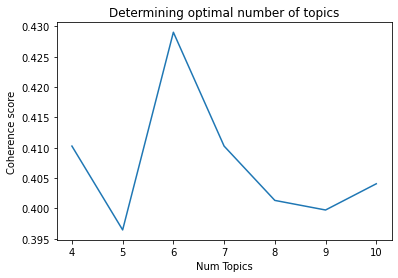

In [569]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Determining optimal number of topics")
plt.show() 

In [570]:
cv = max(coherence_values)
m = x[int((np.where(coherence_values==max(coherence_values)))[0])]
print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 6  has Coherence Value of 0.4291


# Build model

In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           #update_every=1,
                                           #chunksize=100,
                                           #passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
pprint(lda_model.print_topics())

[(0,
  '0.074*"option" + 0.027*"deal" + 0.024*"stuff" + 0.023*"discount" + '
  '0.022*"point" + 0.022*"uber_eat" + 0.020*"coupon" + 0.018*"suck" + '
  '0.016*"order" + 0.015*"code"'),
 (1,
  '0.141*"order" + 0.097*"love" + 0.068*"food" + 0.041*"time" + 0.033*"place" '
  '+ 0.033*"driver" + 0.028*"people" + 0.023*"way" + 0.019*"thank" + '
  '0.016*"delivery"'),
 (2,
  '0.121*"fee" + 0.065*"tip" + 0.053*"price" + 0.050*"delivery" + '
  '0.033*"order" + 0.031*"use" + 0.023*"charge" + 0.022*"thing" + '
  '0.020*"driver" + 0.017*"pay"'),
 (3,
  '0.087*"driver" + 0.077*"order" + 0.033*"issue" + 0.024*"refund" + '
  '0.021*"address" + 0.018*"time" + 0.017*"support" + 0.017*"food" + '
  '0.017*"star" + 0.017*"day"'),
 (4,
  '0.126*"service" + 0.123*"food" + 0.095*"delivery" + 0.083*"time" + '
  '0.039*"work" + 0.022*"experience" + 0.019*"order" + 0.016*"customer" + '
  '0.014*"use" + 0.014*"meal"'),
 (5,
  '0.095*"order" + 0.051*"restaurant" + 0.041*"food" + 0.030*"time" + '
  '0.030*"money" +

In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = plt_gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.097634  0.029685       1        1  24.716305
4     -0.112099  0.052316       2        1  22.526782
3     -0.100066  0.077045       3        1  18.147399
1     -0.104692  0.074042       4        1  14.857659
2      0.031433 -0.322816       5        1  12.430270
0      0.383057  0.089728       6        1   7.321584, topic_info=         Term         Freq         Total Category  logprob  loglift
8     service  4525.000000   4525.000000  Default  30.0000  30.0000
26        fee  2474.000000   2474.000000  Default  29.0000  29.0000
34       love  2276.000000   2276.000000  Default  28.0000  28.0000
0        food  8069.000000   8069.000000  Default  27.0000  27.0000
29   delivery  5378.000000   5378.000000  Default  26.0000  26.0000
..        ...          ...           ...      ...      ...      ...
618      site    77.949455    108.564952   Topic6  -4.9968   2.2831
383   process   116.748983    233.109314   Topic6  -4.5929   1.9229
17      promo    92.554211    172.629573   Topic6  -4.8251   1.9910
5       order   180.263192  10678.891137   Topic6  -4.1585  -1.4673
40       scam    67.925972    234.462300   Topic6  -5.1345   1.3755

[373 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
670       4  0.981354        ability
255       4  0.989960         access
197       1  0.792741        account
197       2  0.084937        account
197       3  0.006662        account
...     ...       ...            ...
1052      4  0.988860  wrong_address
218       2  0.418968           year
218       3  0.396623           year
218       4  0.002793           year
218       5  0.181553           year

[676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 2, 3, 1])

In [35]:
total.rename(columns = {'Content1':'Cleaned_content'}, inplace = True)

In [36]:
total

,ReviewID,Content,Score,Time,Platform,Cleaned_content
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...
...,...,...,...,...,...,...
45992,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food
45993,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool
45994,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite
45995,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great


In [37]:
doc_lda = lda_model[corpus]

In [38]:
# Find the dominant topic for each content
prob = [doc[0] for doc in doc_lda]
topic = [max(i, key=lambda x: x[1])[0] for i in prob]
topic_prob = [max(i, key=lambda x: x[1])[1] for i in prob]

In [39]:
total["Topic"] = topic
total["Topic_Prob"] = topic_prob

In [40]:
total

,ReviewID,Content,Score,Time,Platform,Cleaned_content,Topic,Topic_Prob
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service,4,0.243884
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive,1,0.679465
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...,4,0.341477
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...,5,0.483680
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...,3,0.683907
...,...,...,...,...,...,...,...,...
45992,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food,4,0.592895
45993,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool,4,0.243884
45994,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite,4,0.243884
45995,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great,1,0.549534


In [41]:
aa = total.iloc[:,[1,6,7]]
aa

,Content,Topic,Topic_Prob
0,Very good service 👍,4,0.243884
1,Hate this app. Takes forever to get food and w...,1,0.679465
2,Great food selection and service. Sometimes th...,4,0.341477
3,I am trying to make an order for 2 days now an...,5,0.483680
4,"After not using your app, don't continuously s...",3,0.683907
...,...,...,...
45992,"I am an idiot, but food.",4,0.592895
45993,so cool,4,0.243884
45994,my favorite,4,0.243884
45995,50% o on first 2 orders.. great👍,1,0.549534


In [42]:
# Find the most representative contents for each topic
aa.groupby("Topic", group_keys=False).apply(lambda g: g.nlargest(5, "Topic_Prob"))

,Content,Topic,Topic_Prob
13083,This is not good app for allergic or diet foll...,0,0.856627
1094,I'm so sick and tired of seeing a notification...,0,0.851973
32064,They cansal orders after you order it and that...,0,0.827587
10535,Patiently.....waiting...platformed...not using...,0,0.800500
5312,Very prompt prompt and listen to notes on my b...,0,0.800390
12584,"After placing an order, I would tip the driver...",1,0.913230
11185,I always get southwest grill if I ever order f...,1,0.911735
39844,Constant issues with drivers if you live in an...,1,0.892598
10853,"Orders constantly get cancelled, and it costs ...",1,0.889377
16649,Not one time have I received hot food. All my ...,1,0.888561


In [43]:
# Find the most representative contents for each topic
total.groupby("Topic", group_keys=False).apply(lambda g: g.nlargest(5, "Topic_Prob"))

,ReviewID,Content,Score,Time,Platform,Cleaned_content,Topic,Topic_Prob
13083,gp:AOqpTOHEp0AQ1-3CtnpXgjRc7FCaUzWkH135VNYuVgy...,This is not good app for allergic or diet foll...,1,2021-01-09 07:22:13,Postmates,good allergic diet followers provide much info...,0,0.856627
1094,gp:AOqpTOGgH5V2J_ZKTcMJd60L39VD0eTRyKAedFXtowf...,I'm so sick and tired of seeing a notification...,1,2022-04-22 14:39:23,Ubereats,sick tired seeing notification next order try ...,0,0.851973
32064,gp:AOqpTOG-LYxbS4UFzCK9G2ng6Fq2qWhFEJHx9HnosXE...,They cansal orders after you order it and that...,1,2021-07-31 04:27:45,Grubhub,cansal orders order thatd already waiting hrth...,0,0.827587
10535,gp:AOqpTOFmz8Q8I3ryTtfm5QknnF6Jf8V-DJIjj257Uvg...,Patiently.....waiting...platformed...not using...,5,2021-03-12 10:16:08,Postmates,patientlywaitingplatformednot using yetfocused...,0,0.800500
5312,gp:AOqpTOEkskS-MHUA7VHnI062cdW5Y70RWTxeCw_t3Mc...,Very prompt prompt and listen to notes on my b...,5,2022-04-09 03:49:36,Ubereats,prompt listen notes building lock via wall spe...,0,0.800390
12584,gp:AOqpTOE2WEKJ_y7_i87mLNqqe0UKMwrSKHkMC2ULR2S...,"After placing an order, I would tip the driver...",2,2021-01-19 17:16:43,Postmates,placing order tip driver cash place another im...,1,0.913230
11185,gp:AOqpTOEqFBzAPEYzWwISx8fvV9ggOBWio5onkxdnIC-...,I always get southwest grill if I ever order f...,5,2021-02-24 00:25:14,Postmates,always southwest grill order food time good th...,1,0.911735
39844,gp:AOqpTOHIZo_pe2I1jO14X2HJdYBK02vuPg53GcWsiua...,Constant issues with drivers if you live in an...,1,2022-05-03 18:42:35,DoorDash,constant issues drivers live apartment complex...,1,0.892598
10853,gp:AOqpTOGfATBFU1zNtlGQq4acjUrmEByAUoN4YxIt_vD...,"Orders constantly get cancelled, and it costs ...",1,2021-03-04 17:20:21,Postmates,orders constantly cancelled costs much deliver...,1,0.889377
16649,gp:AOqpTOEU-nHqhHRfrqG9p8K5BtvzY4MGGGuOCmIh9wH...,Not one time have I received hot food. All my ...,1,2020-10-22 17:09:25,Postmates,one time received hot food orders arrive last ...,1,0.888561


In [44]:
topic1 = total.loc[total["Topic"]==0,"Content"]

topic1 = total.loc[total["Topic"]==0,].nlargest(100, "Topic_Prob")["Content"]
topic1

13083    This is not good app for allergic or diet foll...
1094     I'm so sick and tired of seeing a notification...
32064    They cansal orders after you order it and that...
10535    Patiently.....waiting...platformed...not using...
5312     Very prompt prompt and listen to notes on my b...
                               ...                        
23993    Y'all make it to complicated. How long does it...
2040     The most incompetent customer service to ever ...
38842                  Should Offer Nutrition info on site
19139    NEVER late, and my favorite places aren't $5-$...
20294                                         Www3t7463com
Name: Content, Length: 100, dtype: object

In [45]:
topic2 = total.loc[total["Topic"]==1,].nlargest(100, "Topic_Prob")["Content"]
topic3 = total.loc[total["Topic"]==2,].nlargest(100, "Topic_Prob")["Content"]
topic4 = total.loc[total["Topic"]==3,].nlargest(100, "Topic_Prob")["Content"]
topic5 = total.loc[total["Topic"]==4,].nlargest(100, "Topic_Prob")["Content"]
topic6 = total.loc[total["Topic"]==5,].nlargest(100, "Topic_Prob")["Content"]
#topic7 = total.loc[total["Topic"]==6,].nlargest(100, "Topic_Prob")["Content"]

In [46]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [47]:
pwd

'/content'

In [48]:
#%cd /gdrive/My Drive/275
topic1.to_csv('gdrive/My Drive/275/topic1.csv') 
topic2.to_csv('gdrive/My Drive/275/topic2.csv') 
topic3.to_csv('gdrive/My Drive/275/topic3.csv') 
topic4.to_csv('gdrive/My Drive/275/topic4.csv')
topic5.to_csv('gdrive/My Drive/275/topic5.csv') 
topic6.to_csv('gdrive/My Drive/275/topic6.csv') 
#topic7.to_csv('gdrive/My Drive/275/topic7.csv')  

In [49]:
#from google.colab import files
#topic1.to_csv('topic1.csv') 
#files.download('gdrive/My Drive/275/topic1.csv')


# Analysis

In [50]:
### positive: score 4,5，neutral: score 3，negative: score1,2
total.loc[((total["Score"] == 1)|(total["Score"] == 2)),"Sentiment"] = "Negative"
total.loc[((total["Score"] == 4)|(total["Score"] == 5)),"Sentiment"] = "Positive"
total.loc[(total["Score"] == 3),"Sentiment"] = "Neutral"

In [51]:
total

,ReviewID,Content,Score,Time,Platform,Cleaned_content,Topic,Topic_Prob,Sentiment
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,Ubereats,good service,4,0.243884,Positive
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,Ubereats,hate takes forever food way expensive,1,0.679465,Negative
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,Ubereats,great food selection service sometimes restaur...,4,0.341477,Positive
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,Ubereats,trying make order days let last assigned kind ...,5,0.483680,Negative
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,Ubereats,using continuously spam multiple different way...,3,0.683907,Negative
...,...,...,...,...,...,...,...,...,...
45992,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,DoorDash,idiot food,4,0.592895,Positive
45993,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,DoorDash,cool,4,0.243884,Positive
45994,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,DoorDash,favorite,4,0.243884,Positive
45995,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,DoorDash,first orders great,1,0.549534,Positive


### topic distribution in postive reviews for Grubhub

In [52]:
### topic distribution in postive reviews for Grubhub
g_pos = total.loc[(total["Platform"]=="Grubhub")&(total["Sentiment"]=="Positive"),]
g_pos.reset_index(inplace=True, drop=True)
topic_counts = g_pos['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,335,0.0436
1,Order issues,1139,0.1481
2,Delivery fees and tips,421,0.0548
3,Delivery driver issues,562,0.0731
4,Customer service,4574,0.5949
5,Payment issues,658,0.0856


In [53]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,335,0.0436
1,Order issues,1139,0.1481
2,Delivery fees and tips,421,0.0548
3,Delivery driver issues,562,0.0731
4,Customer service,4574,0.5949
5,Payment issues,658,0.0856


Text(0.5, 1.0, 'Topic Distribution of Positive Reviews for Grubhub')

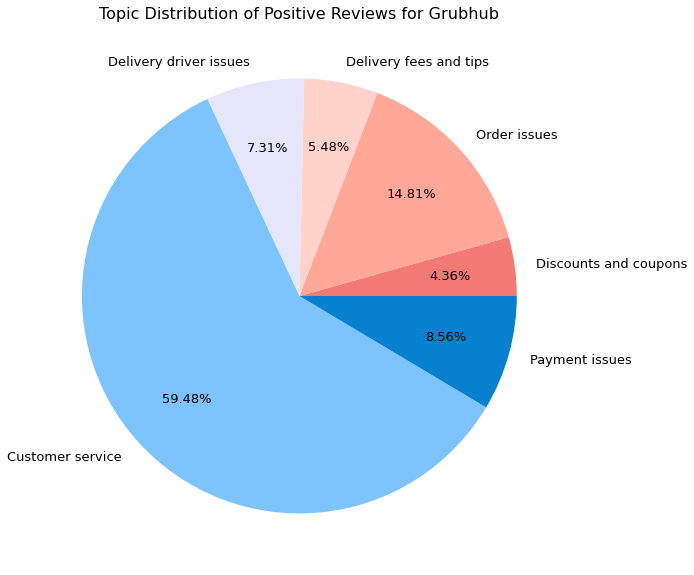

In [54]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Positive Reviews for Grubhub", fontdict = {'fontsize' : 16})

### topic distribution in negative reviews for Grubhub

In [55]:
### topic distribution of negative reviews for Grubhub
g_neg = total.loc[(total["Platform"]=="Grubhub")&(total["Sentiment"]=="Negative"),]
g_neg.reset_index(inplace=True, drop=True)


In [56]:
topic_counts = g_neg['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,251,0.0355
1,Order issues,1015,0.1437
2,Delivery fees and tips,735,0.1041
3,Delivery driver issues,1237,0.1752
4,Customer service,1923,0.2723
5,Payment issues,1900,0.2691


In [57]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,251,0.0355
1,Order issues,1015,0.1437
2,Delivery fees and tips,735,0.1041
3,Delivery driver issues,1237,0.1752
4,Customer service,1923,0.2723
5,Payment issues,1900,0.2691


Text(0.5, 1.0, 'Topic Distribution of Negative Reviews for Grubhub')

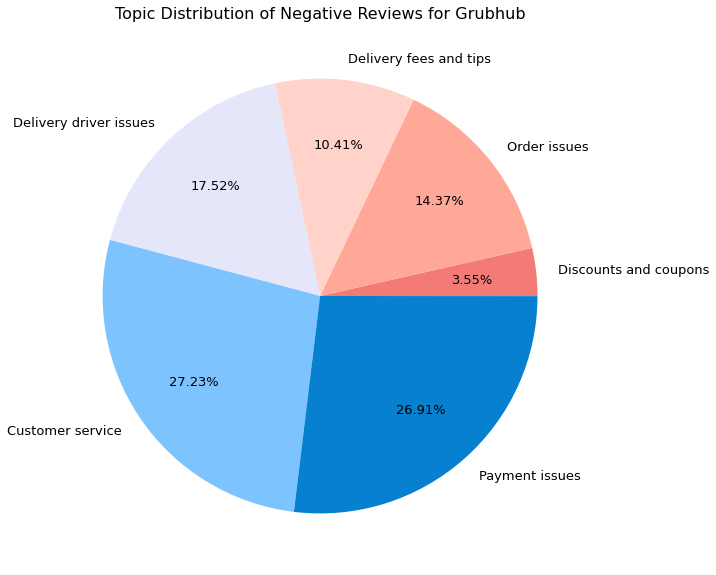

In [58]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf'] #,'#ffbdb1'
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
          textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Negative Reviews for Grubhub", fontdict = {'fontsize' : 16})

### topic distribution in postive reviews for other three apps

In [59]:
### topic distribution in postive reviews for other three apps
upd = total.loc[(total["Platform"]=="Ubereats")|(total["Platform"]=="Postmates")|(total["Platform"]=="DoorDash"),]
upd_pos = upd.loc[(upd["Sentiment"]=="Positive"),]
upd_pos.reset_index(inplace=True, drop=True)
topic_counts = upd_pos['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,909,0.0557
1,Order issues,2400,0.1469
2,Delivery fees and tips,890,0.0545
3,Delivery driver issues,1047,0.0641
4,Customer service,9887,0.6053
5,Payment issues,1200,0.0735


In [60]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,909,0.0557
1,Order issues,2400,0.1469
2,Delivery fees and tips,890,0.0545
3,Delivery driver issues,1047,0.0641
4,Customer service,9887,0.6053
5,Payment issues,1200,0.0735


Text(0.5, 1.0, 'Topic Distribution of Positive Reviews for Other Three Apps')

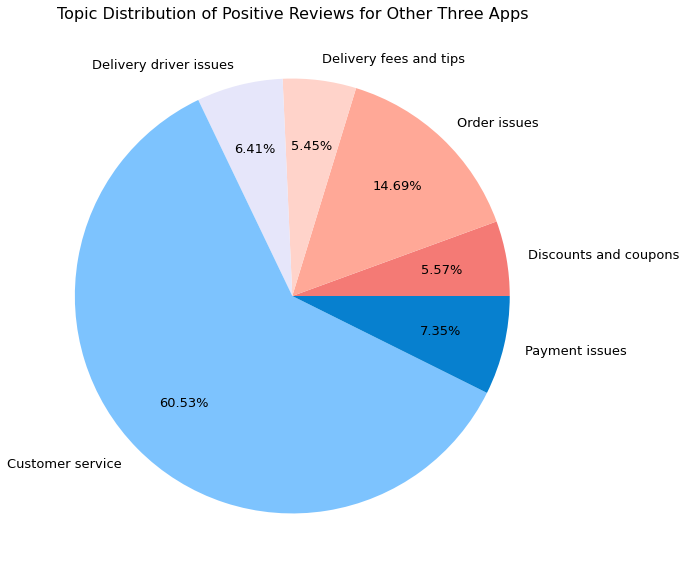

In [61]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
)
plt.title("Topic Distribution of Positive Reviews for Other Three Apps", fontdict = {'fontsize' : 16})

### topic distribution in negative reviews for other three apps

In [62]:
### Topic Distribution of negative Reviews for Other Three Apps
upd = total.loc[(total["Platform"]=="Ubereats")|(total["Platform"]=="Postmates")|(total["Platform"]=="DoorDash"),]
upd_neg = upd.loc[(upd["Sentiment"]=="Negative"),]
upd_neg.reset_index(inplace=True, drop=True)
topic_counts = upd_neg['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,509,0.0429
1,Order issues,1348,0.1136
2,Delivery fees and tips,1224,0.1032
3,Delivery driver issues,2180,0.1838
4,Customer service,3217,0.2712
5,Payment issues,3385,0.2853


In [63]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,509,0.0429
1,Order issues,1348,0.1136
2,Delivery fees and tips,1224,0.1032
3,Delivery driver issues,2180,0.1838
4,Customer service,3217,0.2712
5,Payment issues,3385,0.2853


Text(0.5, 1.0, 'Topic Distribution of Negative Reviews for Other Three Apps')

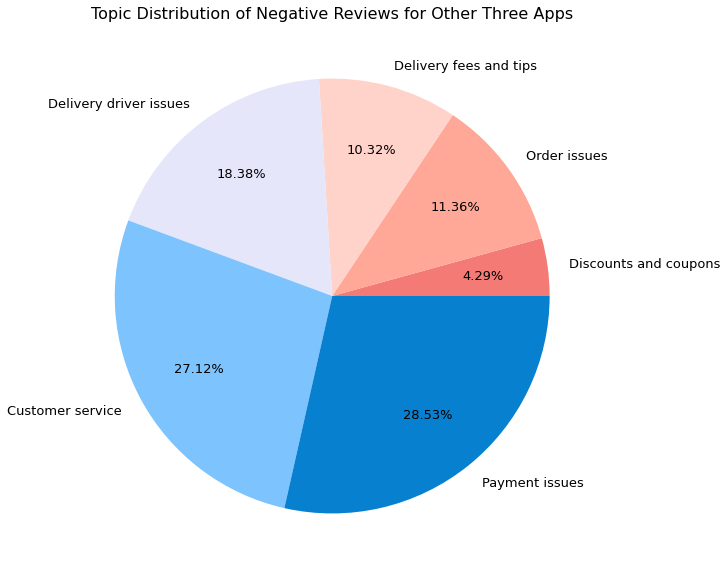

In [64]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Negative Reviews for Other Three Apps", fontdict = {'fontsize' : 16})

### topic distribution in postive reviews for Ubereats

In [65]:
### topic distribution in postive reviews for Ubereats
u_pos = total.loc[(total["Platform"]=="Ubereats")&(total["Sentiment"]=="Positive"),]
u_pos.reset_index(inplace=True, drop=True)
topic_counts = u_pos['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,421,0.0625
1,Order issues,868,0.1289
2,Delivery fees and tips,404,0.0600
3,Delivery driver issues,437,0.0649
4,Customer service,4119,0.6118
5,Payment issues,484,0.0719


In [66]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,421,0.0625
1,Order issues,868,0.1289
2,Delivery fees and tips,404,0.0600
3,Delivery driver issues,437,0.0649
4,Customer service,4119,0.6118
5,Payment issues,484,0.0719


Text(0.5, 1.0, 'Topic Distribution of Positive Reviews for Ubereats')

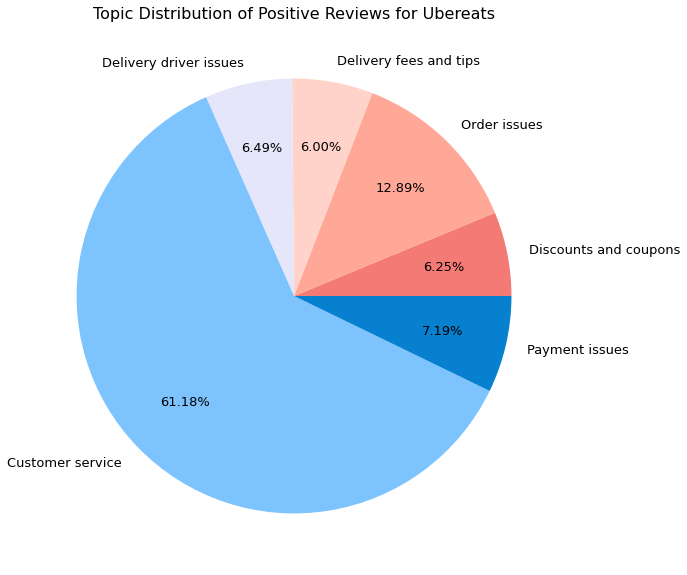

In [67]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Positive Reviews for Ubereats", fontdict = {'fontsize' : 16})

### topic distribution in negative reviews for Ubereats

In [71]:
### topic distribution of negative reviews for Ubereats
u_neg = total.loc[(total["Platform"]=="Ubereats")&(total["Sentiment"]=="Negative"),]
u_neg.reset_index(inplace=True, drop=True)


In [72]:
topic_counts = u_neg['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,177,0.0633
1,Order issues,319,0.1141
2,Delivery fees and tips,253,0.0905
3,Delivery driver issues,540,0.1932
4,Customer service,806,0.2884
5,Payment issues,700,0.2504


In [73]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,177,0.0633
1,Order issues,319,0.1141
2,Delivery fees and tips,253,0.0905
3,Delivery driver issues,540,0.1932
4,Customer service,806,0.2884
5,Payment issues,700,0.2504


Text(0.5, 1.0, 'Topic Distribution of Negative Reviews for Ubereats')

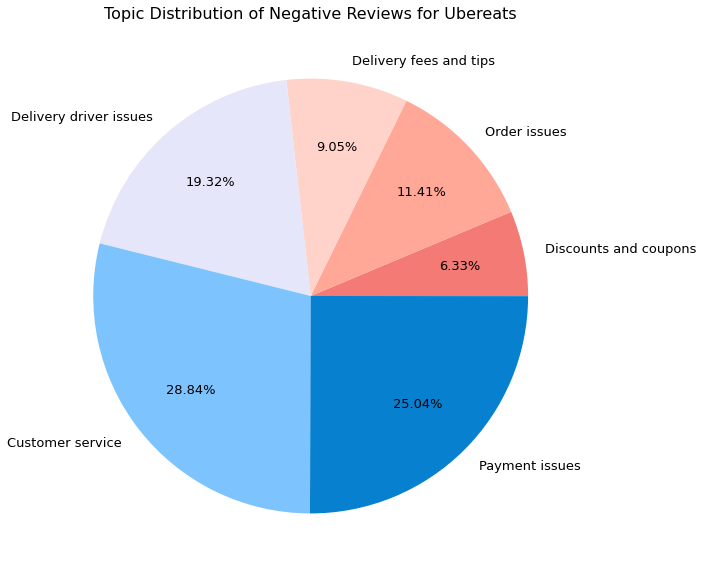

In [74]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf'] #,'#ffbdb1'
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
          textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Negative Reviews for Ubereats", fontdict = {'fontsize' : 16})

### topic distribution in postive reviews for Postmates

In [75]:
### topic distribution in postive reviews for Grubhub
p_pos = total.loc[(total["Platform"]=="Postmates")&(total["Sentiment"]=="Positive"),]
p_pos.reset_index(inplace=True, drop=True)
topic_counts = p_pos['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,253,0.0534
1,Order issues,718,0.1516
2,Delivery fees and tips,232,0.0490
3,Delivery driver issues,314,0.0663
4,Customer service,2874,0.6068
5,Payment issues,345,0.0728


In [76]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,253,0.0534
1,Order issues,718,0.1516
2,Delivery fees and tips,232,0.0490
3,Delivery driver issues,314,0.0663
4,Customer service,2874,0.6068
5,Payment issues,345,0.0728


Text(0.5, 1.0, 'Topic Distribution of Positive Reviews for Postmates')

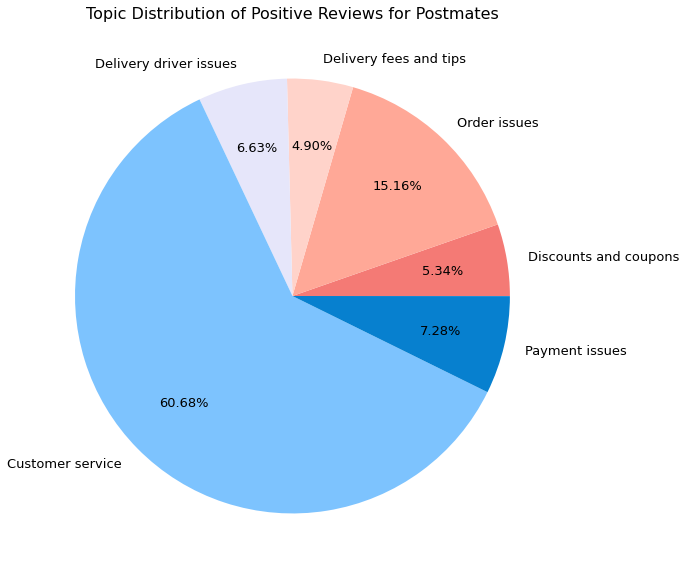

In [77]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Positive Reviews for Postmates", fontdict = {'fontsize' : 16})

### topic distribution in negative reviews for Postmates

In [78]:
### topic distribution of negative reviews for Postmates
p_neg = total.loc[(total["Platform"]=="Postmates")&(total["Sentiment"]=="Negative"),]
p_neg.reset_index(inplace=True, drop=True)


In [79]:
topic_counts = p_neg['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,173,0.0362
1,Order issues,545,0.1142
2,Delivery fees and tips,539,0.1129
3,Delivery driver issues,903,0.1891
4,Customer service,1147,0.2403
5,Payment issues,1467,0.3073


In [80]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,173,0.0362
1,Order issues,545,0.1142
2,Delivery fees and tips,539,0.1129
3,Delivery driver issues,903,0.1891
4,Customer service,1147,0.2403
5,Payment issues,1467,0.3073


Text(0.5, 1.0, 'Topic Distribution of Negative Reviews for Postmates')

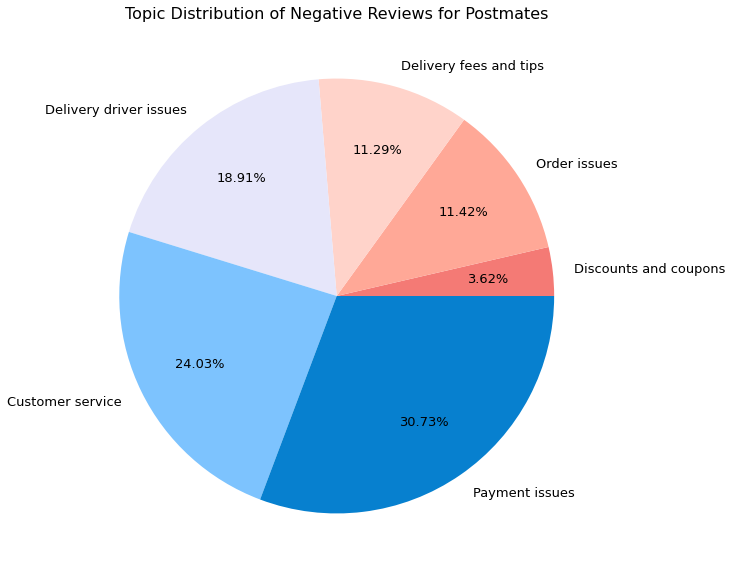

In [81]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf'] #,'#ffbdb1'
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
          textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Negative Reviews for Postmates", fontdict = {'fontsize' : 16})

### topic distribution in postive reviews for DoorDash

In [82]:
### topic distribution in postive reviews for DoorDash
d_pos = total.loc[(total["Platform"]=="DoorDash")&(total["Sentiment"]=="Positive"),]
d_pos.reset_index(inplace=True, drop=True)
topic_counts = d_pos['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics


,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,235,0.0483
1,Order issues,814,0.1674
2,Delivery fees and tips,254,0.0522
3,Delivery driver issues,296,0.0609
4,Customer service,2894,0.5950
5,Payment issues,371,0.0763


In [83]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,235,0.0483
1,Order issues,814,0.1674
2,Delivery fees and tips,254,0.0522
3,Delivery driver issues,296,0.0609
4,Customer service,2894,0.5950
5,Payment issues,371,0.0763


Text(0.5, 1.0, 'Topic Distribution of Positive Reviews for DoorDash')

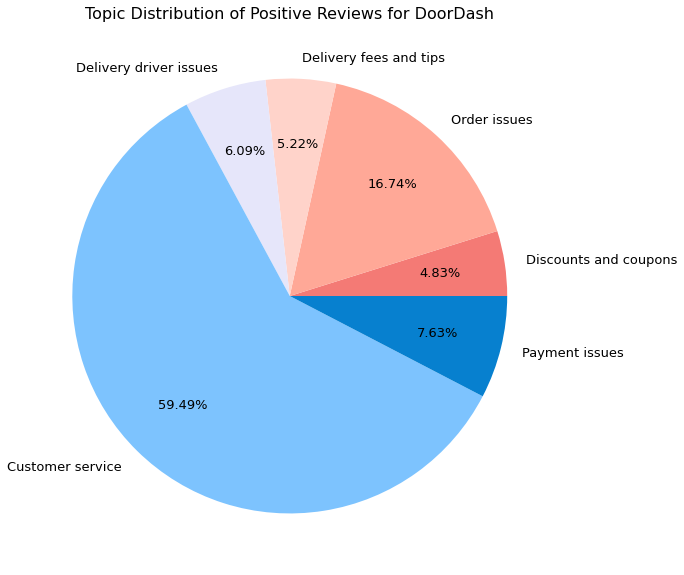

In [84]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf']
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
        textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Positive Reviews for DoorDash", fontdict = {'fontsize' : 16})

### topic distribution in negative reviews for DoorDash

In [85]:
### topic distribution of negative reviews for DoorDash
d_neg = total.loc[(total["Platform"]=="DoorDash")&(total["Sentiment"]=="Negative"),]
d_neg.reset_index(inplace=True, drop=True)


In [86]:
topic_counts = d_neg['Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic = pd.Series(["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"])
df_topics = pd.concat([topic, topic_counts, topic_contribution], axis=1)
df_topics.columns = ['Topic', 'Num_Documents', 'Perc_Documents']
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,159,0.0370
1,Order issues,484,0.1127
2,Delivery fees and tips,432,0.1006
3,Delivery driver issues,737,0.1716
4,Customer service,1264,0.2944
5,Payment issues,1218,0.2837


In [87]:
df_topics.fillna(0,inplace=True)
df_topics

,Topic,Num_Documents,Perc_Documents
0,Discounts and coupons,159,0.0370
1,Order issues,484,0.1127
2,Delivery fees and tips,432,0.1006
3,Delivery driver issues,737,0.1716
4,Customer service,1264,0.2944
5,Payment issues,1218,0.2837


Text(0.5, 1.0, 'Topic Distribution of Negative Reviews for DoorDash')

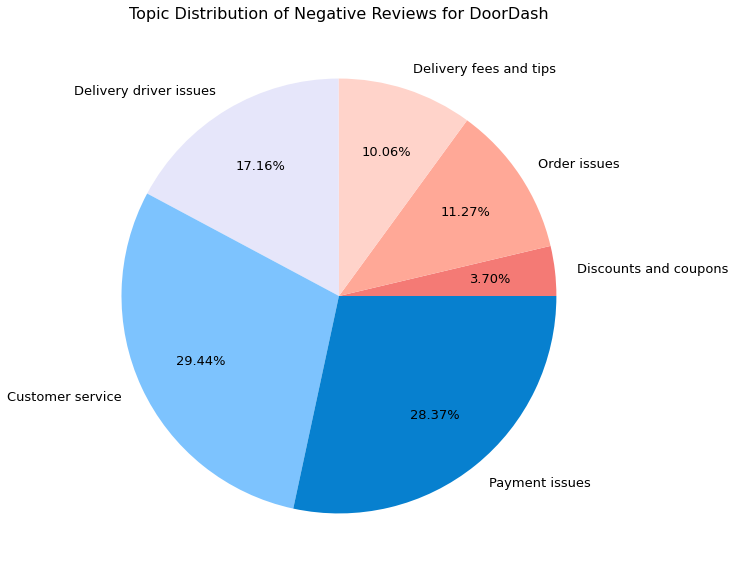

In [88]:
plt.figure(figsize=(20,10))
labels = ["Discounts and coupons","Order issues","Delivery fees and tips","Delivery driver issues","Customer service","Payment issues"]
colors = ['#f47a75','#ffa897','#ffd3ca','#E6E6FA','#7dc3fe','#0780cf'] #,'#ffbdb1'
plt.pie(df_topics["Perc_Documents"],
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1,
          textprops={'fontsize': 13}
        )
plt.title("Topic Distribution of Negative Reviews for DoorDash", fontdict = {'fontsize' : 16})